In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
selfie = cv2.imread('my_selfie_original.jpg')

# ## ✏️ Task A — Pencil Sketch (Color Dodge)

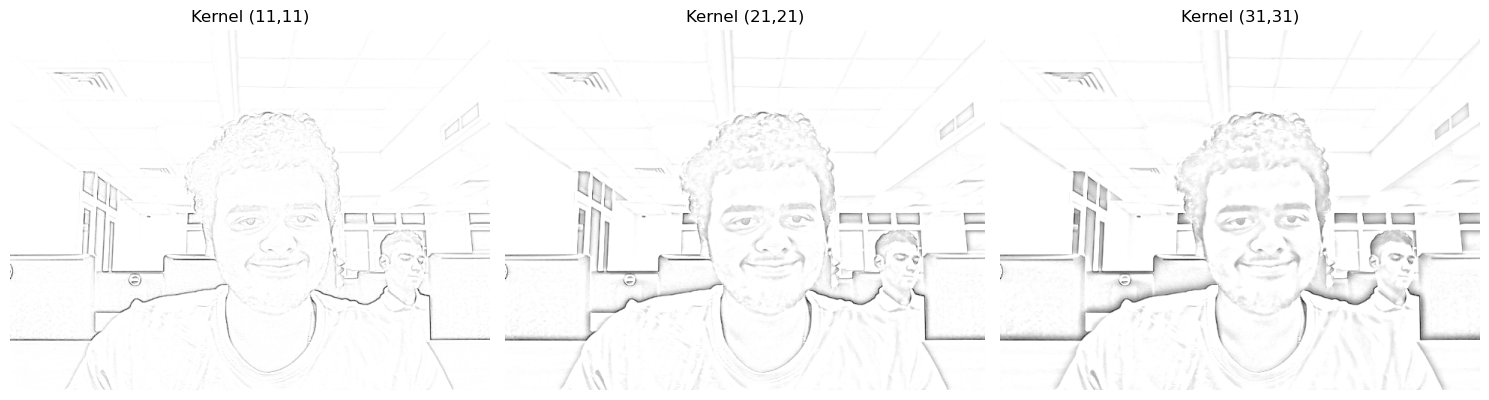

In [5]:

gray  = cv2.cvtColor(selfie, cv2.COLOR_BGR2GRAY)

negative = 255 - gray

blur11 = cv2.GaussianBlur(negative,(11,11),0)
blur21 = cv2.GaussianBlur(negative,(21,21),0)
blur31 = cv2.GaussianBlur(negative,(31,31),0)

sketch11 = cv2.divide(gray, 255 - blur11, scale=256)
sketch21 = cv2.divide(gray, 255 - blur21, scale=256)
sketch31 = cv2.divide(gray, 255 - blur31, scale=256)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Kernel (11,11)', 'Kernel (21,21)', 'Kernel (31,31)']
sketches = [sketch11, sketch21, sketch31]

for ax, sketch, title in zip(axes, sketches, titles):
    ax.imshow(sketch, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()

# Save combined figure as single image
plt.savefig("all_pencil_sketches.jpg")

# Show output
plt.show()

# 📦 Task B — Image Format Playground

 File Sizes 
PNG (lossless)  -> my_selfie.png        : 249 KB
JPEG q=95       -> my_selfie_q95.jpg    : 59 KB
JPEG q=30       -> my_selfie_q30.jpg    : 14 KB
WEBP q=80       -> my_selfie.webp       : 14 KB


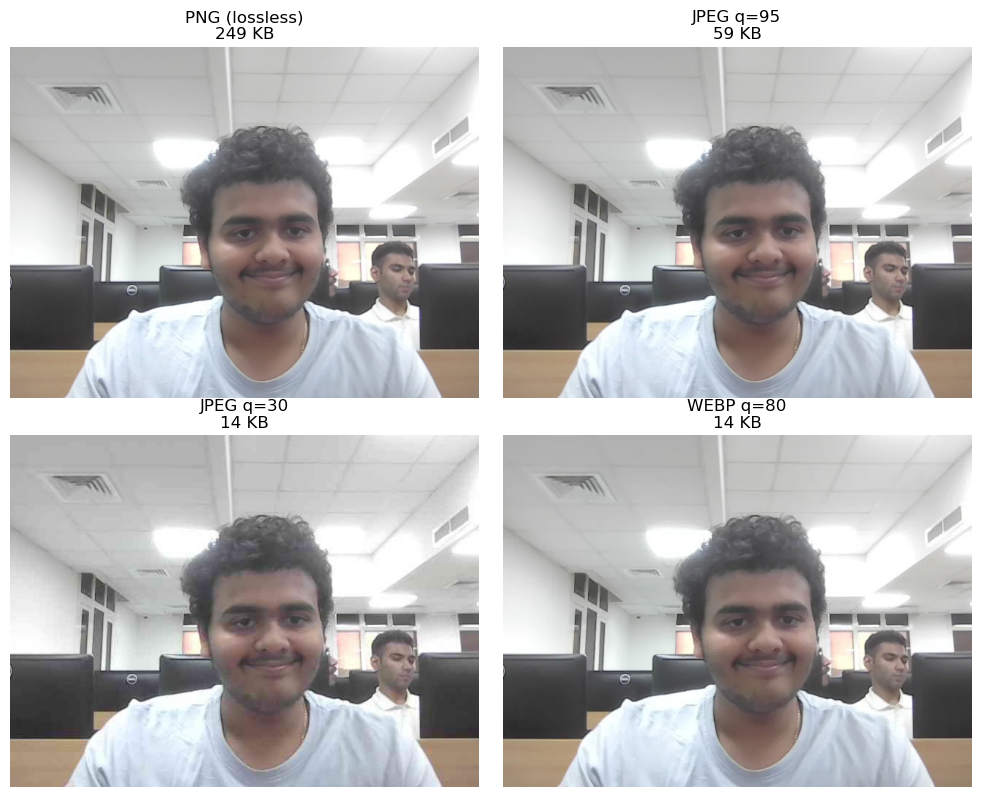


Difference map saved as diff_png_vs_jpg30.png


In [13]:

cv2.imwrite("my_selfie.png", selfie, [cv2.IMWRITE_PNG_COMPRESSION, 3])   # PNG (lossless)
cv2.imwrite("my_selfie_q95.jpg", selfie, [cv2.IMWRITE_JPEG_QUALITY, 95]) # JPEG high quality
cv2.imwrite("my_selfie_q30.jpg", selfie, [cv2.IMWRITE_JPEG_QUALITY, 30]) # JPEG low quality
cv2.imwrite("my_selfie.webp", selfie, [cv2.IMWRITE_WEBP_QUALITY, 80])    # WEBP

img_png   = cv2.imread("my_selfie.png")
img_jpg95 = cv2.imread("my_selfie_q95.jpg")
img_jpg30 = cv2.imread("my_selfie_q30.jpg")
img_webp  = cv2.imread("my_selfie.webp")


imgs = [img_png, img_jpg95, img_jpg30, img_webp]
imgs_rgb = [cv2.cvtColor(im, cv2.COLOR_BGR2RGB) for im in imgs]
titles = ["PNG (lossless)", "JPEG q=95", "JPEG q=30", "WEBP q=80"]
files  = ["my_selfie.png", "my_selfie_q95.jpg", "my_selfie_q30.jpg", "my_selfie.webp"]


sizes = [os.path.getsize(f)//1024  for f in files]


print(" File Sizes ")
for title, fname, size in zip(titles, files, sizes):
    print(f"{title:15} : {fname:20} : {size} KB")


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, img, title, size in zip(axes.ravel(), imgs_rgb, titles, sizes):
    ax.imshow(img)
    ax.set_title(f"{title}\n{size} KB")
    ax.axis('off')

plt.tight_layout()
plt.savefig("format_comparison.png")
plt.show()


diff = cv2.absdiff(img_png, img_jpg30)
cv2.imwrite("diff_png_vs_jpg30.png", diff)
print("\nDifference map saved as diff_png_vs_jpg30.png")


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

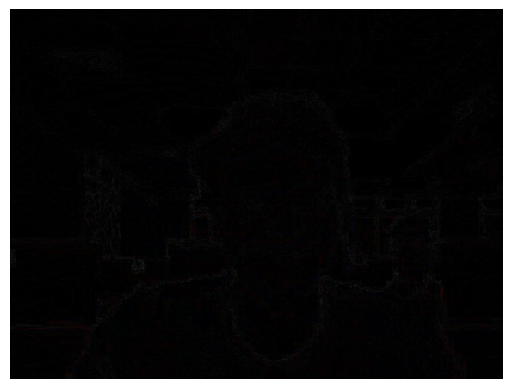

In [15]:
plt.imshow(diff)
plt.axis('off')

# Extension — Mini Snapchat Filter (Instructor Demo + Student Task)

In [23]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

print("Webcam Filters:")
print("Keys: ")
print("  f -> Flip (Mirror)")
print("  i -> Invert (Negative)")
print("  = -> Increase Brightness")
print("  - -> Decrease Brightness")
print("  r -> Rotate 90°")
print("  b -> Smooth (Gaussian Blur)")
print("  s -> Pencil Sketch ")
print("  q -> Quit") 

effects = {'flip': False, 'invert': False, 'blur': False, 'sketch': False}
angle = 0
brightness = 0  # cumulative brightness adjustment

while True:
    ret, frame = cap.read()
    if not ret:
        break

    key = cv2.waitKey(1) & 0xFF
    if key == ord('f'): effects['flip'] = not effects['flip']
    elif key == ord('i'): effects['invert'] = not effects['invert']
    elif key == ord('='): brightness = min(brightness + 30, 255)
    elif key == ord('-'): brightness = max(brightness - 30, -255)
    elif key == ord('r'): angle = (angle + 45) % 360
    elif key == ord('b'): effects['blur'] = not effects['blur']
    elif key == ord('s'): effects['sketch'] = not effects['sketch']
    elif key == ord('q'): break

    out = frame.copy()

    if effects['flip']: out = cv2.flip(out, 1)
    if effects['invert']: out = 255 - out
    if brightness != 0: out = cv2.convertScaleAbs(out, alpha=1, beta=brightness)
    if angle != 0:
        h, w = out.shape[:2]
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        out = cv2.warpAffine(out, M, (w, h))
    if effects['blur']: out = cv2.GaussianBlur(out, (15,15), 0)
    if effects['sketch']:
        gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
        inv = 255 - gray
        blur = cv2.GaussianBlur(inv, (31,31), 0)
        sketch = cv2.divide(gray, 255 - blur, scale=256)
        out = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)

    cv2.imshow("Webcam Filters", out)

cap.release()
cv2.destroyAllWindows()


Webcam Filters:
Keys: 
  f -> Flip (Mirror)
  i -> Invert (Negative)
  = -> Increase Brightness
  - -> Decrease Brightness
  r -> Rotate 90°
  b -> Smooth (Gaussian Blur)
  s -> Pencil Sketch 
  q -> Quit
